In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data.csv')

### Student Population by Ethnicities and Gender.
Looking at the students by gender, filtering out white and caucasian. Most of the ethnicities of the students are mixed race (2+), Hawaiian, and Filipino.

In [2]:
df[(df['IS_WHITE'] == 0) & (df['GENDER'] == 'F')]['ETHNICITY_DESC'].value_counts()[:5]

Mixed Race (2 or more)          377
Native Hawaiian or Part-Hawn    315
Filipino                        290
Mixed Asian                     217
Chinese                         137
Name: ETHNICITY_DESC, dtype: int64

In [3]:
df[(df['IS_WHITE'] == 0) & (df['GENDER'] == 'M')]['ETHNICITY_DESC'].value_counts()[:5]

Mixed Race (2 or more)          428
Filipino                        369
Native Hawaiian or Part-Hawn    368
Mixed Asian                     291
Japanese                        221
Name: ETHNICITY_DESC, dtype: int64

In [4]:
df[(df['IS_WHITE'] == 0) & (df['GENDER'] == 'N')]['ETHNICITY_DESC'].value_counts()[:5]

Mixed Race (2 or more)          17
Filipino                        15
Chinese                         12
Japanese                         8
Native Hawaiian or Part-Hawn     7
Name: ETHNICITY_DESC, dtype: int64

In [5]:
# Created a flag to identify non-traditional students (age 25+)
# About 4 times more traditional students than non-traditional ones.

def traditional(x):
    if x <= 24:
        return 1 
    else:
        return 0
df['is_traditioanal'] = df.AGE.apply(traditional)
df['is_traditioanal'].value_counts()

1    3999
0    1087
Name: is_traditioanal, dtype: int64

In [6]:
# Created a function to clean the citizen column to imput 'Data not available' if no data was found.
def fill_citizen(x):
    if pd.isnull(x):
        return 'Data not available'
    else:
        return x
    
df['citizen_clean'] = df['CITIZENSHIP_DESC'].apply(fill_citizen)

# Binned the ages into quartiles to segment the student population.
df['quartile'] = pd.qcut(df['AGE'], 4, labels=["Q1", "Q2", "Q3", "Q4"])
df['quartile'].value_counts()

Q2    1829
Q1    1424
Q4    1087
Q3     746
Name: quartile, dtype: int64

### Aggregate counts of majors.
Looked at the overall distribution of majors in the dataset Do find that Biology is a popular major, followed by Computer Science, Creative Media, and engineering. 

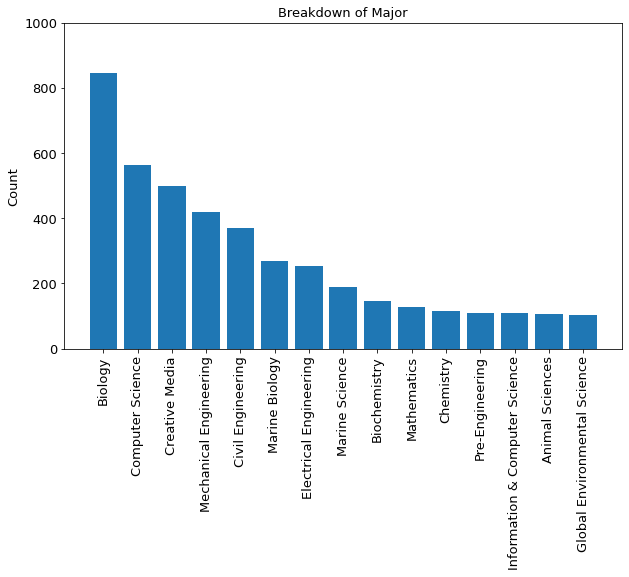

In [7]:
df_gb_major = df.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gb_major['cumulative_sum'] = df_gb_major.IRO_INSTITUTION.cumsum() / df_gb_major.IRO_INSTITUTION.sum()

plt.figure(figsize=(10, 6))
plt.bar(df_gb_major.MAJOR_DESC_IRO, df_gb_major.IRO_INSTITUTION)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 1000)
plt.ylabel('Count', fontsize=13)
plt.title('Breakdown of Major', fontsize=13)
plt.show()

### Distribution of Majors by Engineering and Science.

Subset the data into engineering and science majors. For the engineering majors, Computer Science, Mechanical Engineering, and Civil  Engineering are the top majors. For the science group, Biology, Creative Media, and Marine Biology are popular. 

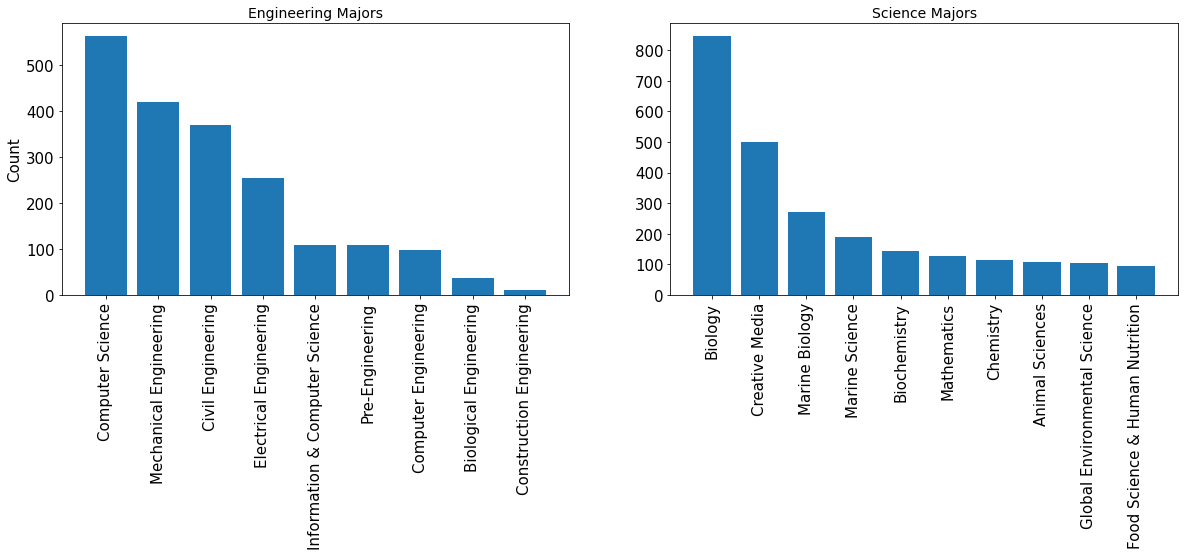

In [8]:
cols_list = ['MAJOR_DESC_IRO'] 
search_values = ['Chemistry',
                 'Creative Media',
                 'Atmospheric Sciences',
                 'Physics',
                 'Animal Sciences',
                 'Mathematics',
                 'Geology',
                 'Marine Science',
                 'Natural Science',
                 'Zoology',
                 'Geology & Geophysics',
                 'Molecular & Cell Biology',
                 'Earth Science',
                 'Environmental Earth Science',
                 'Trop Agriculture & Environment',
                 'Global Environmental Science',
                 'Marine Biology',
                 'Astrophysics',
                 'Microbiology',
                 'Environmental Science',
                 'Biochemistry',
                 'Biology',
                 'Medical Technology',
                 'Molecular Biosciences &Biotech',
                 'Botany',
                 'Food Science & Human Nutrition',
                 'Tropical Plant & Soil Sciences',
                 'Astronomy']

df_science =df[df[cols_list].stack().str.contains('|'.join(search_values),case=False).any(level=0)]

df_science = df_science.groupby(['MAJOR_DESC_IRO'], 
                             as_index=False).count()[['MAJOR_DESC_IRO',                     
                                                      'IRO_INSTITUTION']].sort_values(by='IRO_INSTITUTION', 
                                                                                      ascending=False).head(10).reset_index(drop=True)


df_engr = df[(df['MAJOR_DESC_IRO'].str.contains("Engineering")) | (df['MAJOR_DESC_IRO'].str.contains("Computer"))]
df_engr_gb = df_engr.groupby(['MAJOR_DESC_IRO'], 
                             as_index=False).count()[['MAJOR_DESC_IRO',                     
                                                      'IRO_INSTITUTION']].sort_values(by='IRO_INSTITUTION', 
                                                                                      ascending=False).head(9).reset_index(drop=True)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Engineering Majors', fontsize=14)
plt.bar(df_engr_gb.MAJOR_DESC_IRO, df_engr_gb.IRO_INSTITUTION)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(1, 2, 2)
plt.title('Science Majors', fontsize=14)
plt.bar(df_science.MAJOR_DESC_IRO, df_science.IRO_INSTITUTION)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Distribution of Majors by Gender.

Looked at the distribution of majors by gender. In all cases (M/F/N), Biology, Creative Media and Computer Science are popular majors. 

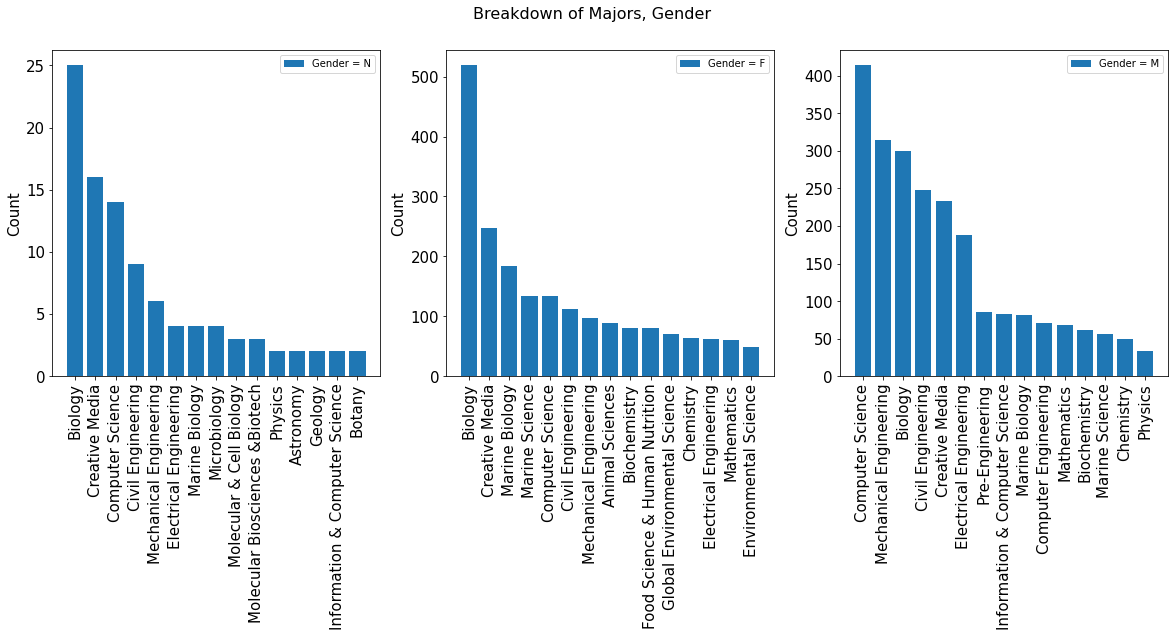

In [9]:
df_gender = df.groupby(['GENDER', 'MAJOR_DESC_IRO'], as_index=False).count()
df_gender_N = df_gender[df_gender['GENDER'] == 'N'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gender_M = df_gender[df_gender['GENDER'] == 'M'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_gender_F = df_gender[df_gender['GENDER'] == 'F'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.bar(df_gender_N.MAJOR_DESC_IRO, df_gender_N.IRO_INSTITUTION, label='Gender = N')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(df_gender_F.MAJOR_DESC_IRO, df_gender_F.IRO_INSTITUTION, label='Gender = F')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(df_gender_M.MAJOR_DESC_IRO, df_gender_M.IRO_INSTITUTION, label='Gender = M')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Gender', fontsize=16)
plt.show()

### Distribution  of Majors by Color.

Looked at the distribution of majors by students of color. For students of color, the most popular majors include Biology, Computer Science, and Creative Media. For white students, the most common majors are biology, marine biology, and science.

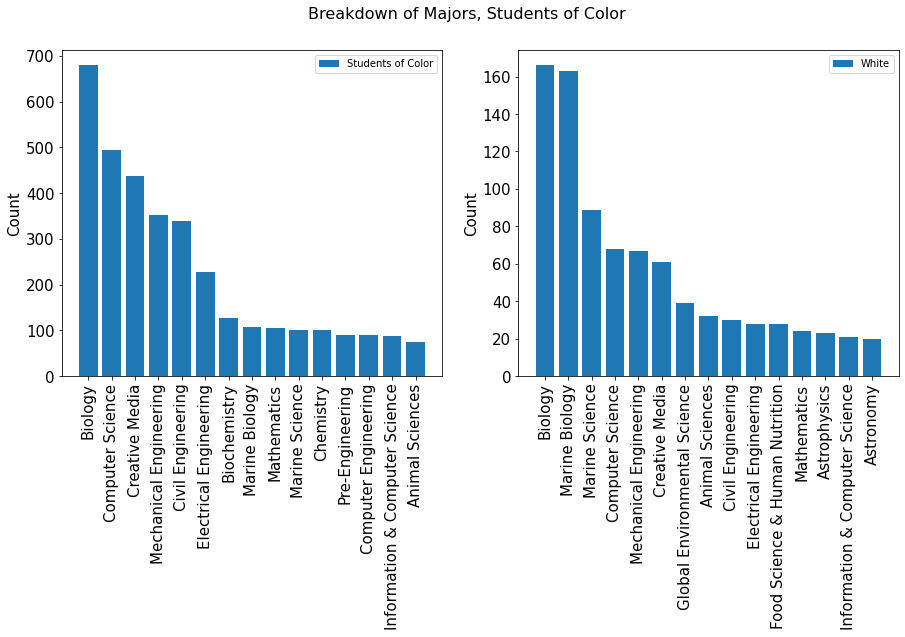

In [10]:
df_color = df.groupby(['IS_WHITE', 'MAJOR_DESC_IRO'], as_index=False).count()
df_color_white = df_color[df_color['IS_WHITE'] == 1].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_color_color = df_color[df_color['IS_WHITE'] == 0].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_color_color.MAJOR_DESC_IRO, df_color_color.IRO_INSTITUTION, label='Students of Color')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_color_white.MAJOR_DESC_IRO, df_color_white.IRO_INSTITUTION, label='White')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Students of Color', fontsize=16)

plt.show()

### Distribution of majors by Age Quartile.

Looked at the distribution of majors by age quartile. It seems that biology is a popular major, by far, for the younger population; however, as for the older people, more folks major in computer science and creative media, in addition to biology.

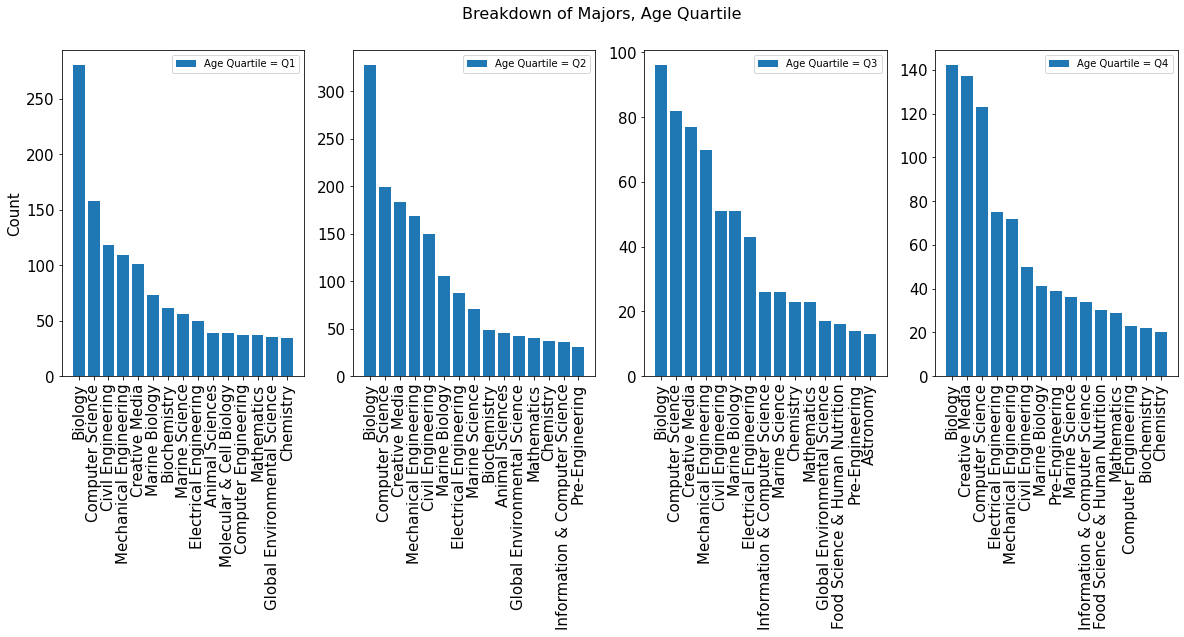

In [11]:
df_quartile = df.groupby(['quartile', 'MAJOR_DESC_IRO'], as_index=False).count()
df_quartile_q4 = df_quartile[df_quartile['quartile'] == 'Q4'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q3 = df_quartile[df_quartile['quartile'] == 'Q3'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q2 = df_quartile[df_quartile['quartile'] == 'Q2'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_quartile_q1 = df_quartile[df_quartile['quartile'] == 'Q1'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.bar(df_quartile_q1.MAJOR_DESC_IRO, df_quartile_q1.IRO_INSTITUTION, label='Age Quartile = Q1')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 4, 2)
plt.bar(df_quartile_q2.MAJOR_DESC_IRO, df_quartile_q2.IRO_INSTITUTION, label='Age Quartile = Q2')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(1, 4, 3)
plt.bar(df_quartile_q3.MAJOR_DESC_IRO, df_quartile_q3.IRO_INSTITUTION, label='Age Quartile = Q3')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(1, 4, 4)
plt.bar(df_quartile_q4.MAJOR_DESC_IRO, df_quartile_q4.IRO_INSTITUTION, label='Age Quartile = Q4')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Age Quartile', fontsize=16)

plt.show()

### Histogram  of Ages.

Data shows that the age for the science and engineering majors is right skewed.

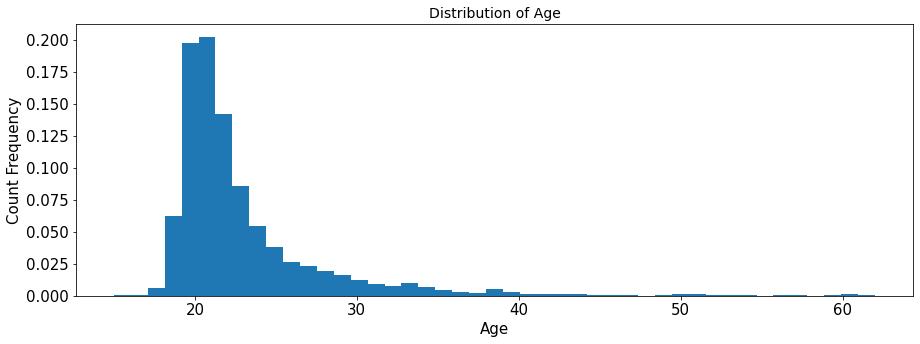

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(df.AGE, bins=45, density=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count Frequency', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.title('Distribution of Age', fontsize=14)
plt.show()

### Distribution of ages by ethnic group.

For some of the groups, the age range for the students is broader than others.For example, African American, mixed race and Hispanic have wider bands than say, Tongan, Pacific Islander and Other Asian.

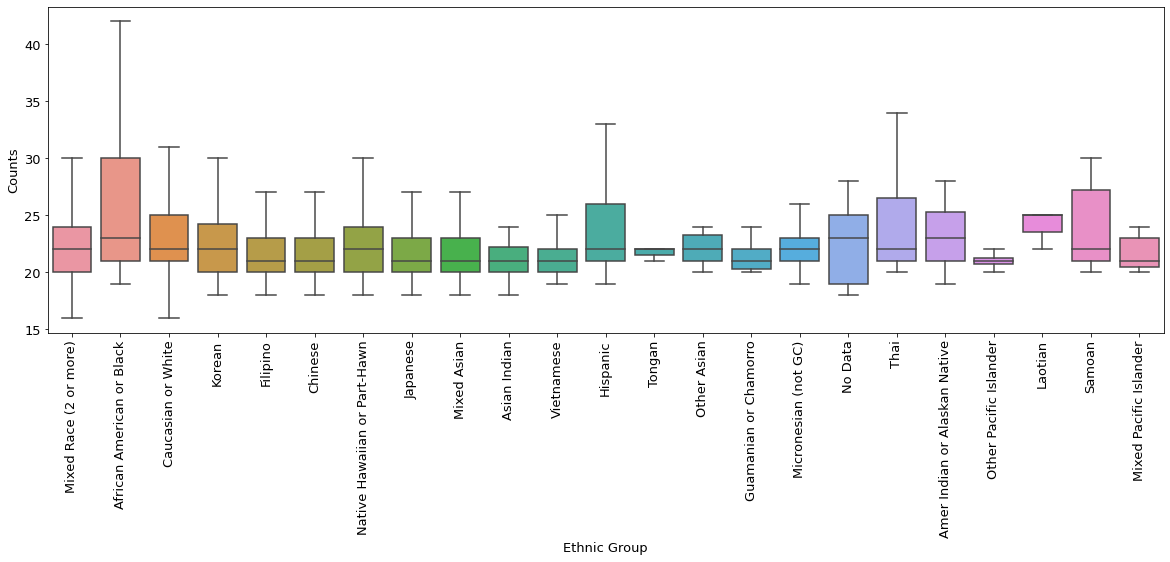

In [13]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x="ETHNICITY_DESC", y="AGE", data=df, showfliers=False)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Ethnic Group', fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.show()

### Distribution  of majors: Hawaiian vs Non-Hawaiian Students

Looked at the distribution of majors by Hawaiian vs Non-Hawaiian students. From the data, it seems that Hawaiian students major in Biology and Creative Media (in almost equal parts).  Non-Hawaiian students favor biology than computer science and creative media.

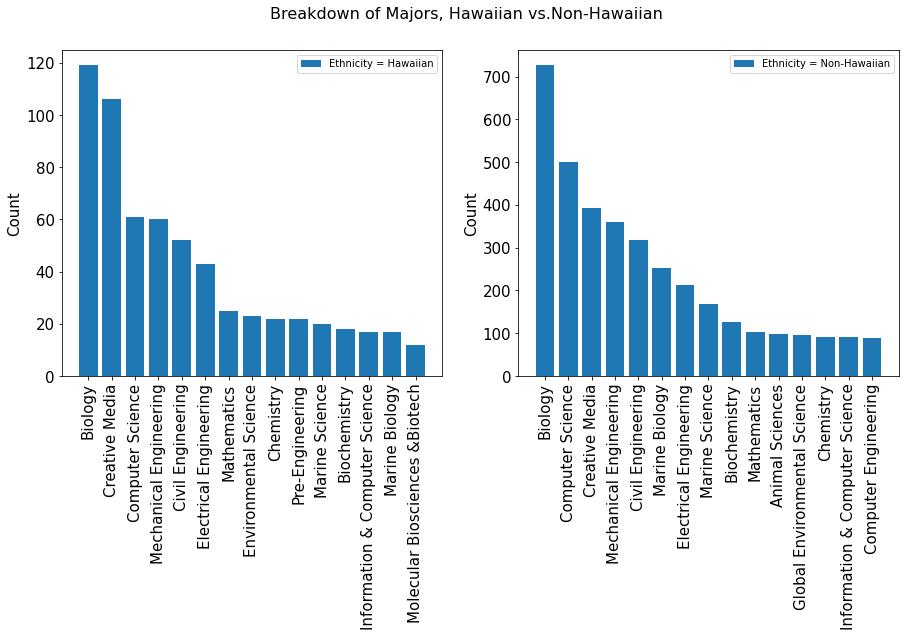

In [14]:
df_hwn = df.groupby(['HAWAIIAN_IRO', 'MAJOR_DESC_IRO'], as_index=False).count()
df_hwn_y = df_hwn[df_hwn['HAWAIIAN_IRO'] == 'Y'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_hwn_n = df_hwn[df_hwn['HAWAIIAN_IRO'] == 'N'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_hwn_y.MAJOR_DESC_IRO, df_hwn_y.IRO_INSTITUTION, label='Ethnicity = Hawaiian')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_hwn_n.MAJOR_DESC_IRO, df_hwn_n.IRO_INSTITUTION, label='Ethnicity = Non-Hawaiian')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, Hawaiian vs.Non-Hawaiian', fontsize=16)

plt.show()

### Distribution of majors by Gender and Ethnic Group (Hawaiian)

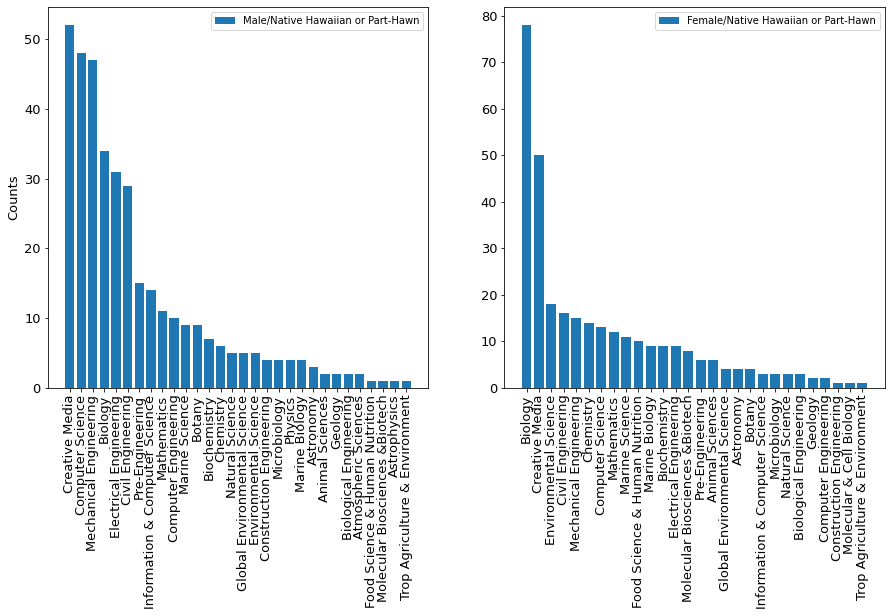

In [15]:
df1 = df[(df['GENDER'] == 'M') & 
         (df['ETHNICITY_DESC']== 'Native Hawaiian or Part-Hawn')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)

df2 = df[(df['GENDER'] == 'F') & 
         (df['ETHNICITY_DESC']== 'Native Hawaiian or Part-Hawn')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(df1['MAJOR_DESC_IRO'], df1['IRO_INSTITUTION'], label='Male/Native Hawaiian or Part-Hawn')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df2['MAJOR_DESC_IRO'], df2['IRO_INSTITUTION'], label='Female/Native Hawaiian or Part-Hawn')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

### Distribution of majors by Gender and Ethnic Group (Filipino)

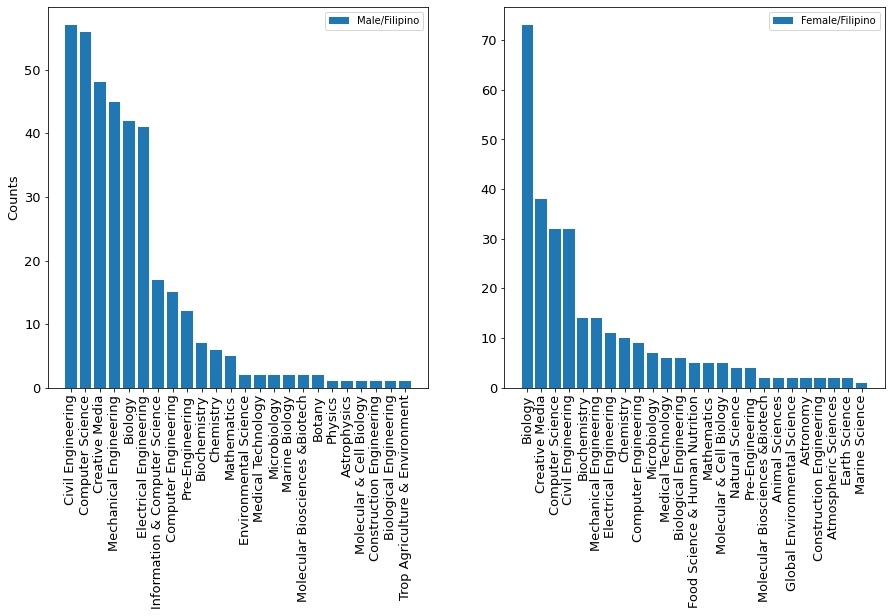

In [16]:
df1 = df[(df['GENDER'] == 'M') & 
         (df['ETHNICITY_DESC']== 'Filipino')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)

df2 = df[(df['GENDER'] == 'F') & 
         (df['ETHNICITY_DESC']== 'Filipino')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(df1['MAJOR_DESC_IRO'], df1['IRO_INSTITUTION'], label='Male/Filipino')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df2['MAJOR_DESC_IRO'], df2['IRO_INSTITUTION'], label='Female/Filipino')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

### Distribution of majors by Gender and Ethnic Group (Mixed race (2+))

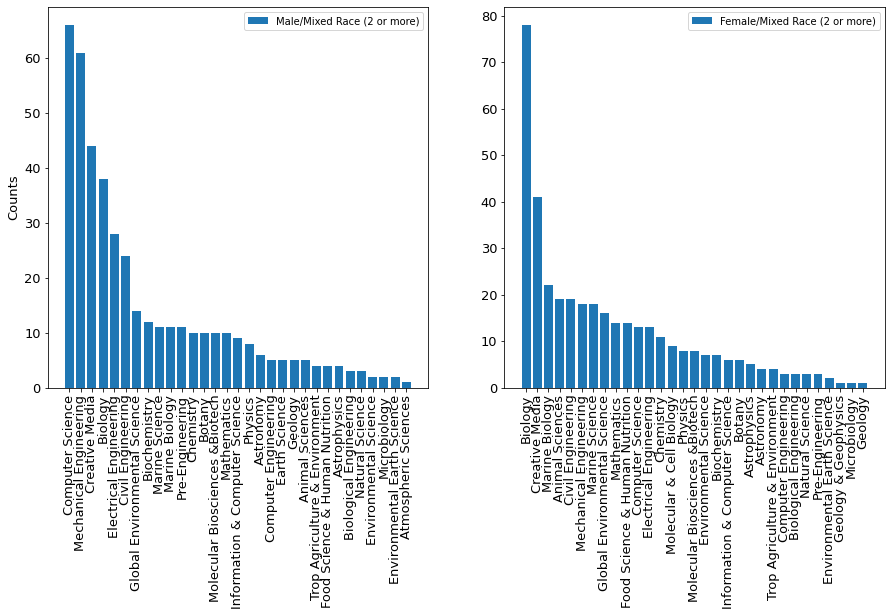

In [17]:
df1 = df[(df['GENDER'] == 'M') & 
         (df['ETHNICITY_DESC']== 'Mixed Race (2 or more)')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)

df2 = df[(df['GENDER'] == 'F') & 
         (df['ETHNICITY_DESC']== 'Mixed Race (2 or more)')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(df1['MAJOR_DESC_IRO'], df1['IRO_INSTITUTION'], label='Male/Mixed Race (2 or more)')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df2['MAJOR_DESC_IRO'], df2['IRO_INSTITUTION'], label='Female/Mixed Race (2 or more)')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

### Distribution of majors by Gender and Ethnic Group (Mixed Asian)

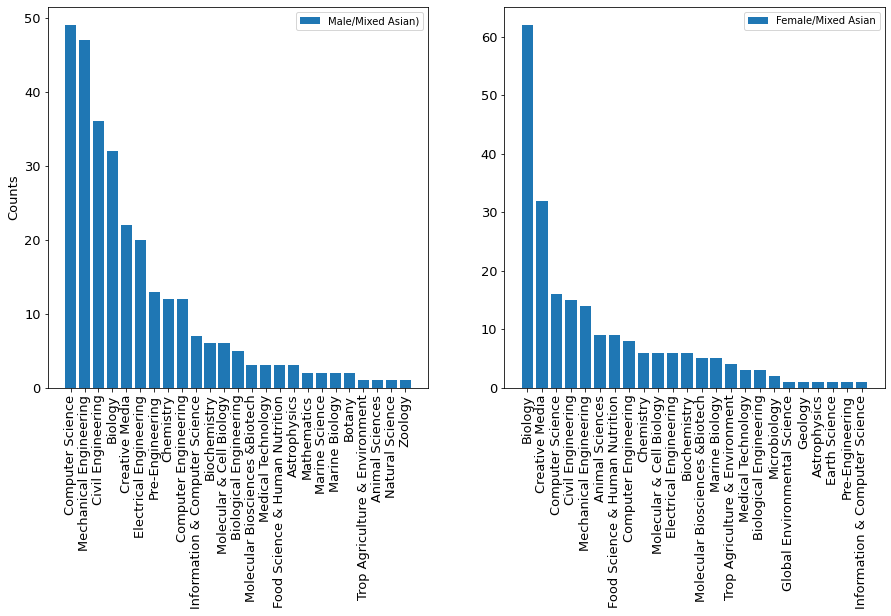

In [18]:
df1 = df[(df['GENDER'] == 'M') & 
         (df['ETHNICITY_DESC']== 'Mixed Asian')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)

df2 = df[(df['GENDER'] == 'F') & 
         (df['ETHNICITY_DESC']== 'Mixed Asian')].groupby('MAJOR_DESC_IRO', 
                                                                          as_index=False).count().sort_values(by='IRO_INSTITUTION', 
                                                                                                              ascending=False)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(df1['MAJOR_DESC_IRO'], df1['IRO_INSTITUTION'], label='Male/Mixed Asian)')
plt.xticks(rotation=90, fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df2['MAJOR_DESC_IRO'], df2['IRO_INSTITUTION'], label='Female/Mixed Asian')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

### Most common major by Ethnic group.

For most groups, the most common major is biology. 

In [19]:
major_list = []
group_list = []
for each in list(set(df['ETHNICITY_DESC'].tolist())):
    df_major = df[df['ETHNICITY_DESC'] == each].groupby('MAJOR_DESC_IRO', as_index=False).count()
    major = df_major.sort_values(by='IRO_INSTITUTION', ascending=False).head()['MAJOR_DESC_IRO'].iloc[0]
    major_list.append(major)
    group_list.append(each)

major_dict = dict(zip(group_list, major_list))

pd.DataFrame({'Group': list(major_dict.keys()),
             'Most_Common_Major': list(major_dict.values())})

Group       Most_Common_Major
0          Mixed Race (2 or more)                 Biology
1                     Other Asian                 Biology
2                      Vietnamese                 Biology
3            Micronesian (not GC)          Marine Science
4                         No Data        Computer Science
5                            Thai      Medical Technology
6    Native Hawaiian or Part-Hawn                 Biology
7                          Korean                 Biology
8                        Hispanic                 Biology
9                         Laotian          Creative Media
10             Caucasian or White                 Biology
11         Other Pacific Islander  Mechanical Engineering
12         Mixed Pacific Islander                 Biology
13  Amer Indian or Alaskan Native                 Biology
14                        Chinese        Computer Science
15                       Filipino                 Biology
16      African American or Black          Creative Media
17          Guamanian or Chamorro         Pre-Engineering
18                       Japanese                 Biology
19                         Samoan                 Biology
20                   Asian Indian        Computer Science
21                         Tongan                 Biology
22                    Mixed Asian                 Biology

### Distribution of majors by Citizen Type.

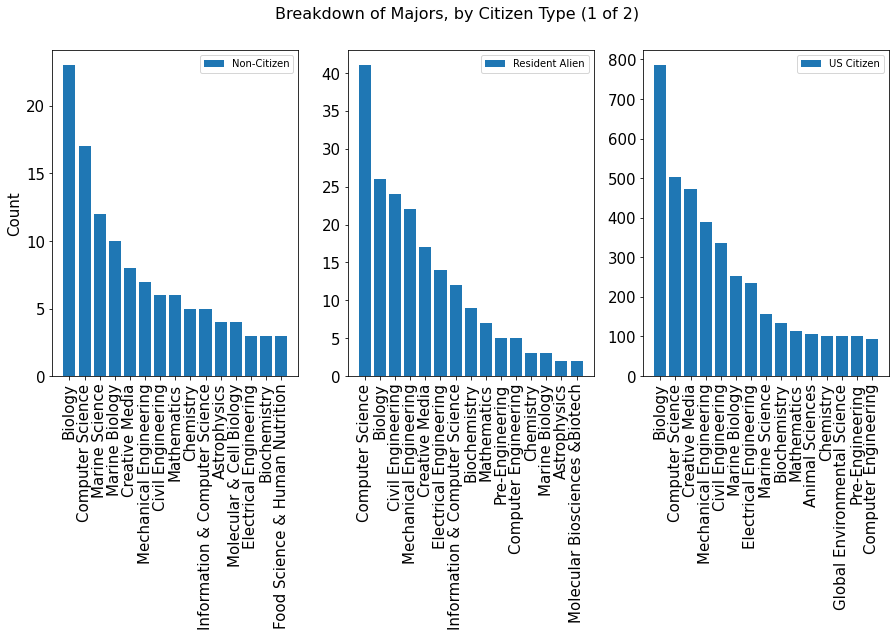

In [20]:
df_citizen = df.groupby(['citizen_clean', 'MAJOR_DESC_IRO'], as_index=False).count()
df_citizen_not = df_citizen[df_citizen['citizen_clean'] == 'Data not available'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_nc = df_citizen[df_citizen['citizen_clean'] == 'Non-Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_ra = df_citizen[df_citizen['citizen_clean'] == 'Resident Alien'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_us = df_citizen[df_citizen['citizen_clean'] == 'US Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_citizen_nat = df_citizen[df_citizen['citizen_clean'] == 'US National or CFAS Citizen'].sort_values(by='IRO_INSTITUTION', ascending=False).head(15)

rows = 1
cols = 3
plt.figure(figsize=(15, 6))

plt.subplot(rows, cols, 1)
plt.bar(df_citizen_nc.MAJOR_DESC_IRO, df_citizen_nc.IRO_INSTITUTION, label='Non-Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()

plt.subplot(rows, cols, 2)
plt.bar(df_citizen_ra.MAJOR_DESC_IRO, df_citizen_ra.IRO_INSTITUTION, label='Resident Alien')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.subplot(rows, cols, 3)
plt.bar(df_citizen_us.MAJOR_DESC_IRO, df_citizen_us.IRO_INSTITUTION, label='US Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.legend()

plt.suptitle('Breakdown of Majors, by Citizen Type (1 of 2)', fontsize=16)

plt.show()

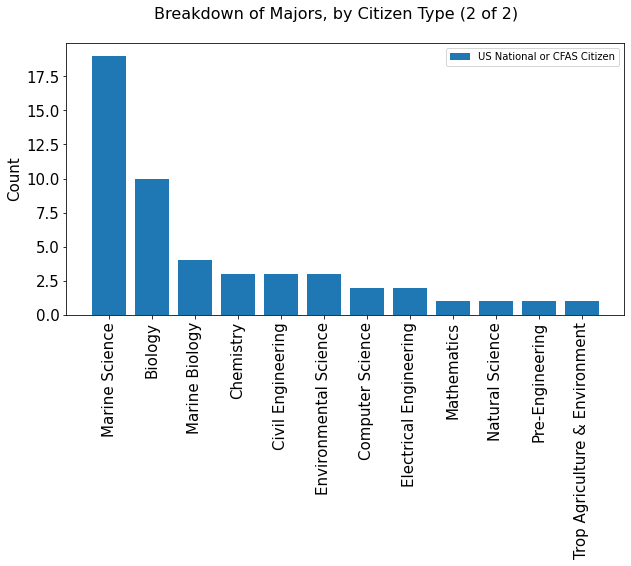

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.bar(df_citizen_nat.MAJOR_DESC_IRO, df_citizen_nat.IRO_INSTITUTION, label='US National or CFAS Citizen')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()
plt.suptitle('Breakdown of Majors, by Citizen Type (2 of 2)', fontsize=16)
plt.show()

### Distribution of majors for _Non-Traditional_ Students by Gender and Ethnicity.

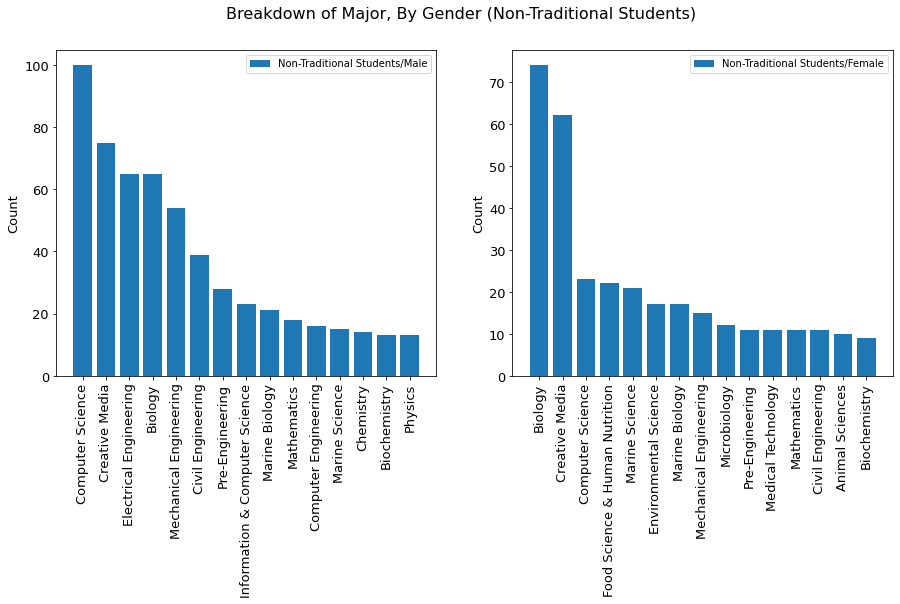

In [22]:
df_trad_M = df[(df['GENDER'] == 'M') & (df['is_traditioanal'] == 0)]
df_trad_F = df[(df['GENDER'] == 'F') & (df['is_traditioanal'] == 0)]
df_trad_N = df[(df['GENDER'] == 'N') & (df['is_traditioanal'] == 0)]

df_trad_M_gb = df_trad_M.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_trad_F_gb = df_trad_F.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_trad_N_gb = df_trad_N.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_trad_M_gb.MAJOR_DESC_IRO, df_trad_M_gb.IRO_INSTITUTION, label='Non-Traditional Students/Male')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_trad_F_gb.MAJOR_DESC_IRO, df_trad_F_gb.IRO_INSTITUTION, label='Non-Traditional Students/Female')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()

plt.suptitle('Breakdown of Major, By Gender (Non-Traditional Students)', fontsize=16)
plt.show()

### Distribution of majors for _Traditional_ Students by Gender and Ethnicity.

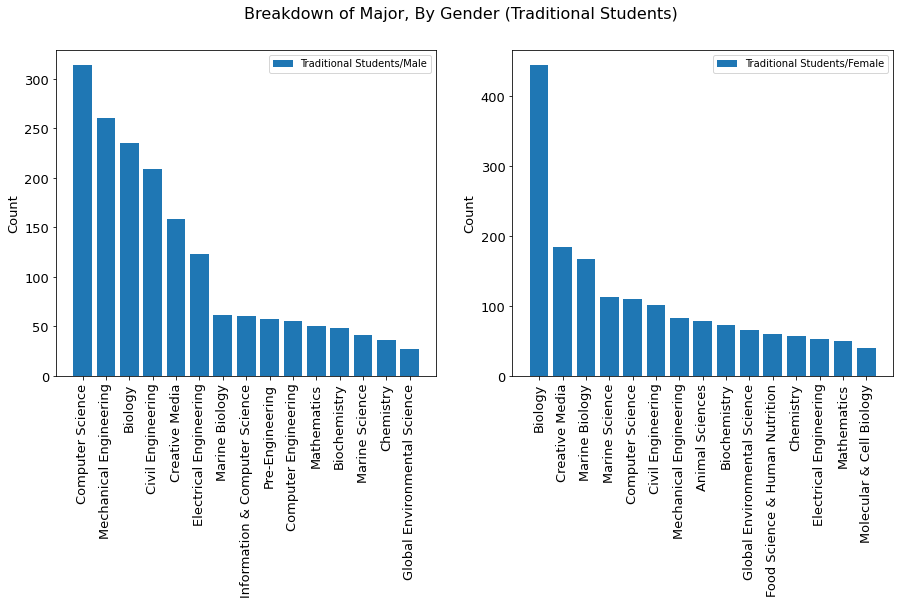

In [23]:
df_trad_M= df[(df['GENDER'] == 'M') & (df['is_traditioanal'] == 1)]
df_trad_F = df[(df['GENDER'] == 'F') & (df['is_traditioanal'] == 1)]
df_trad_N = df[(df['GENDER'] == 'N') & (df['is_traditioanal'] == 1)]

df_trad_M_gb = df_trad_M.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_trad_F_gb = df_trad_F.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)
df_trad_N_gb = df_trad_N.groupby(by="MAJOR_DESC_IRO", as_index=False).count().sort_values(by='IRO_INSTITUTION', ascending=False).head(15)


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(df_trad_M_gb.MAJOR_DESC_IRO, df_trad_M_gb.IRO_INSTITUTION, label='Traditional Students/Male')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(df_trad_F_gb.MAJOR_DESC_IRO, df_trad_F_gb.IRO_INSTITUTION, label='Traditional Students/Female')
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()


plt.suptitle('Breakdown of Major, By Gender (Traditional Students)', fontsize=16)
plt.show()